****
<a id='lesson-3'></a>
# Module :  Integration
****

Computing integrals (numerically) is an important task in many computational fields. In this tutorial we will explore two schemes:
- finite difference schemes / grid schemes
- Monte Carlo scheme

Scipy has 'integrate' function: learn its usage to compuate the 'exact' value of the integral


## Grid schemes
Typically used for 1-D or 2-D integrals, by evaluating the value of the function on a regular grid and then using approximation schemes like 'trapezoidal rule'

## Task-1
Following are the sub-tasks
- Write a function that takes as input a *function* and interval, and returns the value of the integral. Assume the fuction to be one-dimensional function
- Using the above function, find the area of a unit circle



## Task-2
 Exploratory task: Adaptive grid size. When the function changes 'too fast', then next grid point is 'closer' (and change is 'too slow', then next grid point is 'farther'). Using thisi adaptive scheme compute the area of unit circle.



## Monte Carlo methods
Monte Carlo methods are typically used when we have very large dimensional integrals.

## Task-3: Compute the area of the quarter unit circle (1st quadrant)  using <span style='color:red'> simple </span> Monte Carlo method


## Task-4
Simple Monte Carlo is almost never used; here is the 'theory' for a more proper usage...

Let us consider an integral:
$$ I = \int_a^b f(x)~dx$$
where $x\in \mathcal{R}^N$. Such multi-dimensional integrals occur in physics, chemistry, all branches of engineering, and one standard technique is to use Monte Carlo sampling. Below is a rather short presenation of connection between sampling and such integrals

### Multi-dimensional integrals using Monte Carlo sampling

$$I = \int_a^b dx~f(x) = \int_a^b dx~\rho(x) \left( \frac{f(x)}{\rho(x)}\right) =\int_a^b \rho(x)~g(x)~dx $$
with the restriction that $\rho(x)\ne0\forall x\in[a,b]$, and $g(x)={f(x)}/{\rho(x)}$.  

When the fuction $\rho(x)$ statisfies the following conditions:
1. $\rho(x) \ge 0~\forall~x\in[a,b]$
2. $\int_a^b dx~\rho(x) = 1$

such a function can be considered a probability density function.

When $\rho(x)$ is a probability density function,
$$ I = \int_a^b \rho(x)~g(x)~dx = \mathbb{E}_{x\sim\rho}~g(x)= \text{average value of } g(x) \text{ with } x \text{ sampled with probability density }\rho(x)$$
The power of the Monte Carlo method comes from the flexibility in the choice of $\rho(x)$. If $\rho(x)$ is so chosen that it is also large when $|f(x)|$ is large and $\rho(x)$ is small when $|f(x)|$ is small, the efficiency of computing the integral is great. In a proper statistics course, this is demostrated by showing that the variance of computation decreases; this will not be attempted here. The 'Monte Carlo' in the name comes from the fact that random sampling of $x$ with probability density $\rho(x)$; gambling in casinos rely heavily on random numbers.

### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$



### Task 4.2: Compute the are of the circle with $\rho(x)$ being the Gaussian distribution (i.e. normal distribution)



## Task-5 One simple measure of efficiency of computation

What is possible is to check that the efficiency of computation: how 'fast' is the computation? Smaller is the number of function evaluations used, greater is the efficiency. Alternatively, for the same number of function evaluations, lower error would mean greater efficiency.

Compute the graph of $N$ vs $error(N)$ where $N$ is the number of function computations, under various schemes listed below:
1. Naive Monte Carlo
2. Importance Sampling with uniform  distrituion
3. Importance Sampling with Gaussian districutuion



# WORKBOOK STARTS from here

# Grid Based scheme (Task-1)

 We will plot the area of the unit semi-circle (i.e. unit circle with $y>0$). We know that the exact area of the unit semi-circle is $\pi/2$. So to show the assymptotic convergence with respect to the number of intervals ($N$), we will plot $I(N) / (\pi/2)$, which will assymptotically tend to $1$ as $N\rightarrow\infty$

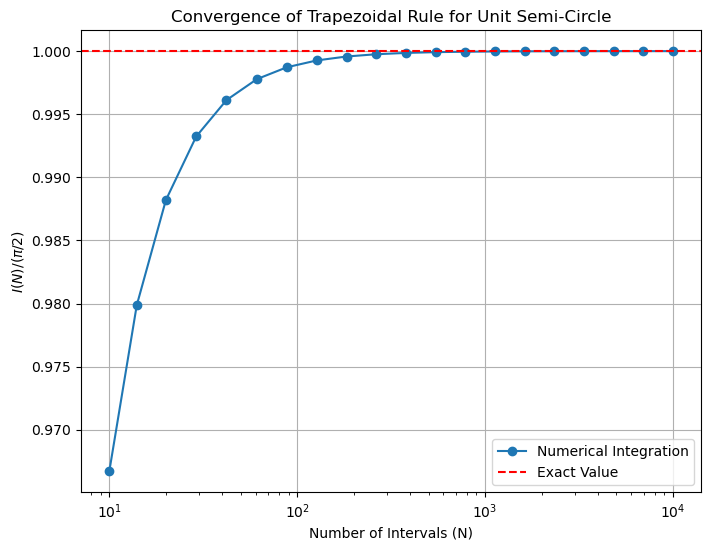

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def semicircle_function(x):
    return np.sqrt(1 - x**2)

def trapezoidal_rule(func, a, b, N):
    x = np.linspace(a, b, N+1)
    y = func(x)
    integral = (b - a) / (2 * N) * (2 * np.sum(y) - y[0] - y[-1])
    return integral

# Exact area of unit semi-circle
exact_area = np.pi / 2

# Compute numerical integration for different N
N_values = np.logspace(1, 4, 20, dtype=int)
I_values = np.array([trapezoidal_rule(semicircle_function, -1, 1, N) for N in N_values])

# Compute ratio I(N) / (pi/2)
ratios = I_values / exact_area

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(N_values, ratios, marker='o', linestyle='-', label='Numerical Integration')
plt.axhline(y=1, color='r', linestyle='--', label='Exact Value')
plt.xscale('log')
plt.xlabel('Number of Intervals (N)')
plt.ylabel(r'$I(N) / (\pi/2)$')
plt.title('Convergence of Trapezoidal Rule for Unit Semi-Circle')
plt.legend()
plt.grid()
plt.show()


# Adaptive grid method (Task-2)

## Homework
Generic idea is the following:
1. $x_0 = a$ and set $i=0$
2. for $ x_i < b$, do the following:
     1. $h_i = ?$ ; choose $h_i$ inversely proportional to absolute value of the derivative, $|f^\prime(x_i)|$
     2. $x_{i+1} = x_{i} + h_i$
     3. compute the contribution of this interval to integral
     3. check $x_{i+1} < b$, if yes end of the interval reached; else increase $i$

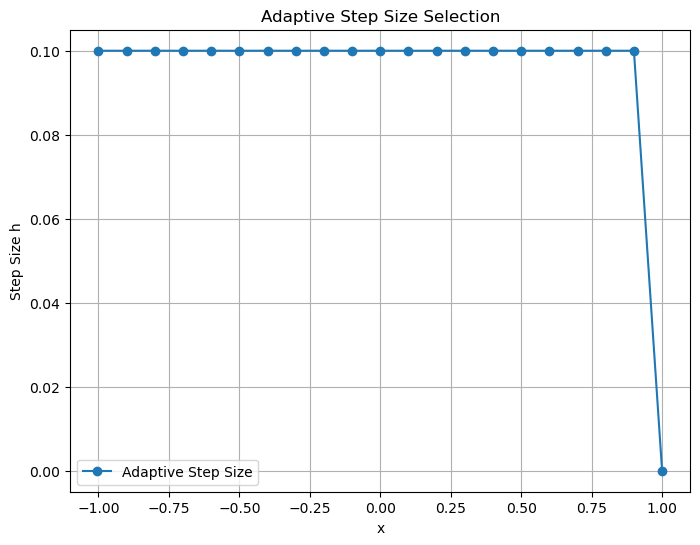

Adaptive Integral: 1.5522591641778303
Ratio I_adaptive/(pi/2): 0.9881988757543825


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def semicircle_function(x):
    """Function representing the upper half of the unit circle."""
    return np.sqrt(np.maximum(0, 1 - x**2))  # Ensure non-negative values

def semicircle_derivative(x):
    """Derivative of the semicircle function to determine adaptive step size."""
    if abs(x) >= 1:
        return 0  # Avoid division by zero at x = ±1
    return -x / np.sqrt(1 - x**2)

def adaptive_trapezoidal_rule(func, a, b, N_max=1000, tolerance=1e-4):
    """Adaptive integration using a step size inversely proportional to the derivative."""
    x_values = [a]
    integral = 0
    i = 0
    
    while x_values[-1] < b and i < N_max:
        x_i = x_values[-1]
        
        # Compute adaptive step size h_i
        derivative = abs(semicircle_derivative(x_i))
        h_i = min(0.1, 0.5 / (1 + derivative))  # Ensure h_i is not too large
        
        # Next x value
        x_next = x_i + h_i
        
        # Ensure we do not go beyond the boundary
        if x_next > b:
            x_next = b
        
        # Trapezoidal rule contribution
        integral += 0.5 * (x_next - x_i) * (func(x_i) + func(x_next))
        
        # Store next x value
        x_values.append(x_next)
        
        # Increment counter
        i += 1
    
    return integral, x_values

# Exact area of unit semi-circle
exact_area = np.pi / 2

# Compute adaptive integration
adaptive_integral, x_values = adaptive_trapezoidal_rule(semicircle_function, -1, 1)

# Compute ratio I_adaptive / (pi/2)
adaptive_ratio = adaptive_integral / exact_area

# Ensure x_values contains multiple points for plotting
if len(x_values) > 1:
    step_sizes = np.diff(x_values)
else:
    step_sizes = [0]

# Plot step size variation
plt.figure(figsize=(8, 6))
plt.plot(x_values[:-1], step_sizes, marker='o', linestyle='-', label='Adaptive Step Size')
plt.xlabel('x')
plt.ylabel('Step Size h')
plt.title('Adaptive Step Size Selection')
plt.legend()
plt.grid()
plt.show()

print(f"Adaptive Integral: {adaptive_integral}")
print(f"Ratio I_adaptive/(pi/2): {adaptive_ratio}")


# Task-3  
Area of quarter circle using naive Monte Carlo


Consider a unit square. Generate $N$ random points _inside_ this square. Consider the quarter circle (or any other shape) that is completely inside the square. We can estimate the are of the quarter circle by using the probilistic argument that the ratio of areas of quarter circle and square equals the fraction of points that lie inside the quarter circle. That is:
$$ \frac{A_c}{A_s} = \lim_{N_s \rightarrow\infty}\frac{N_c}{N_s}
$$
where subsrcipt $c$ and $s$ are used to denote properties of quarter-circle and square respectively; and $A$ stands for area and $N$ stands for number of points



1. function ComputeQuarterCircleArea(num_random_pts)
2. for each pt in range(num_random_pts):
        set pt = (random x, random y)
        check if pt is inside the circle
3. Estimate area of the quarter cicle.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def compute_quarter_circle_area(num_random_pts):
    """Estimate the area of the quarter-circle using Monte Carlo method."""
    inside_circle = 0
    
    for _ in range(num_random_pts):
        x, y = np.random.uniform(0, 1, 2)  # Generate random point in unit square
        if x**2 + y**2 <= 1:  # Check if inside quarter-circle
            inside_circle += 1
    
    estimated_area = inside_circle / num_random_pts  # Ratio of points inside quarter-circle
    return estimated_area * 4  # Scale to full unit circle area

# Number of random points
num_points = 10000
estimated_area = compute_quarter_circle_area(num_points)

# Exact area of quarter-circle
exact_area = np.pi / 4

# Compute ratio estimated / exact
area_ratio = estimated_area / exact_area

print(f"Estimated Area of Quarter-Circle: {estimated_area}")
print(f"Ratio Estimated/Exact: {area_ratio}")


Estimated Area of Quarter-Circle: 3.1628
Ratio Estimated/Exact: 4.027002032088372


### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$

1. MonteCarlo_Uniform(f,a,b,num_points): to integrate f in x in [a,b] using num_point samples of uniform distribution


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def compute_quarter_circle_area(num_random_pts):
    """Estimate the area of the quarter-circle using Monte Carlo method."""
    inside_circle = 0
    
    for _ in range(num_random_pts):
        x, y = np.random.uniform(0, 1, 2)  # Generate random point in unit square
        if x**2 + y**2 <= 1:  # Check if inside quarter-circle
            inside_circle += 1
    
    estimated_area = inside_circle / num_random_pts  # Ratio of points inside quarter-circle
    return estimated_area * 4  # Scale to full unit circle area

def MonteCarlo_Uniform(f, a, b, num_points):
    """Monte Carlo integration with uniform sampling."""
    x_samples = np.random.uniform(a, b, num_points)  # Sample points uniformly
    f_values = f(x_samples)  # Evaluate function at sampled points
    integral_estimate = (b - a) * np.mean(f_values)  # Compute integral estimate
    return integral_estimate

# Function representing upper half of unit circle
def semicircle_function(x):
    return np.sqrt(np.maximum(0, 1 - x**2))

# Compute integral using Monte Carlo with uniform sampling
num_points = 10000
estimated_area_monte_carlo = MonteCarlo_Uniform(semicircle_function, -1, 1, num_points) * 2  # Scale for full circle

# Exact area of circle
exact_area = np.pi

# Compute ratio estimated / exact
area_ratio_monte_carlo = estimated_area_monte_carlo / exact_area

print(f"Estimated Area of Circle (Monte Carlo Uniform): {estimated_area_monte_carlo}")
print(f"Ratio Estimated/Exact: {area_ratio_monte_carlo}")


Estimated Area of Circle (Monte Carlo Uniform): 3.1325255518452626
Ratio Estimated/Exact: 0.9971138518756817


## Task 4.2: Similar to  Task 4.1
### Compute the are of the circle with $\rho(x)$ being the Gaussian distribution (i.e. normal distribution)




In [9]:
import numpy as np
import matplotlib.pyplot as plt

def compute_quarter_circle_area(num_random_pts):
    """Estimate the area of the quarter-circle using Monte Carlo method."""
    inside_circle = 0
    
    for _ in range(num_random_pts):
        x, y = np.random.uniform(0, 1, 2)  # Generate random point in unit square
        if x**2 + y**2 <= 1:  # Check if inside quarter-circle
            inside_circle += 1
    
    estimated_area = inside_circle / num_random_pts  # Ratio of points inside quarter-circle
    return estimated_area * 4  # Scale to full unit circle area

def MonteCarlo_Uniform(f, a, b, num_points):
    """Monte Carlo integration with uniform sampling."""
    x_samples = np.random.uniform(a, b, num_points)  # Sample points uniformly
    f_values = f(x_samples)  # Evaluate function at sampled points
    integral_estimate = (b - a) * np.mean(f_values)  # Compute integral estimate
    return integral_estimate

def MonteCarlo_Gaussian(f, num_points):
    """Monte Carlo integration with Gaussian sampling."""
    x_samples = np.random.normal(0, 0.5, num_points)  # Sample points from N(0, 0.5)
    weights = 1 / (np.sqrt(2 * np.pi) * 0.5) * np.exp(-x_samples**2 / (2 * 0.5**2))  # PDF of N(0, 0.5)
    f_values = f(x_samples) / weights  # Importance sampling correction
    integral_estimate = np.mean(f_values)
    return integral_estimate * 2  # Scale for full circle

# Function representing upper half of unit circle
def semicircle_function(x):
    return np.sqrt(np.maximum(0, 1 - x**2))

# Compute integral using Monte Carlo with uniform sampling
num_points = 10000
estimated_area_monte_carlo = MonteCarlo_Uniform(semicircle_function, -1, 1, num_points) * 2  # Scale for full circle

# Compute integral using Monte Carlo with Gaussian sampling
estimated_area_monte_carlo_gaussian = MonteCarlo_Gaussian(semicircle_function, num_points)

# Exact area of circle
exact_area = np.pi

# Compute ratios estimated / exact
area_ratio_monte_carlo = estimated_area_monte_carlo / exact_area
area_ratio_monte_carlo_gaussian = estimated_area_monte_carlo_gaussian / exact_area

print(f"Estimated Area of Circle (Monte Carlo Uniform): {estimated_area_monte_carlo}")
print(f"Ratio Estimated/Exact (Uniform): {area_ratio_monte_carlo}")
print(f"Estimated Area of Circle (Monte Carlo Gaussian): {estimated_area_monte_carlo_gaussian}")
print(f"Ratio Estimated/Exact (Gaussian): {area_ratio_monte_carlo_gaussian}")

Estimated Area of Circle (Monte Carlo Uniform): 3.1330097757289113
Ratio Estimated/Exact (Uniform): 0.9972679851249733
Estimated Area of Circle (Monte Carlo Gaussian): 3.1041078587603055
Ratio Estimated/Exact (Gaussian): 0.9880682192242031


# Task 5: Compute error(N) for various N, for computing area of circle using Monte Carlo methods
1. Naive Monte Carlo
2. Importance sampling with uniform distribution
3. Importance sampling with gaussian distribution

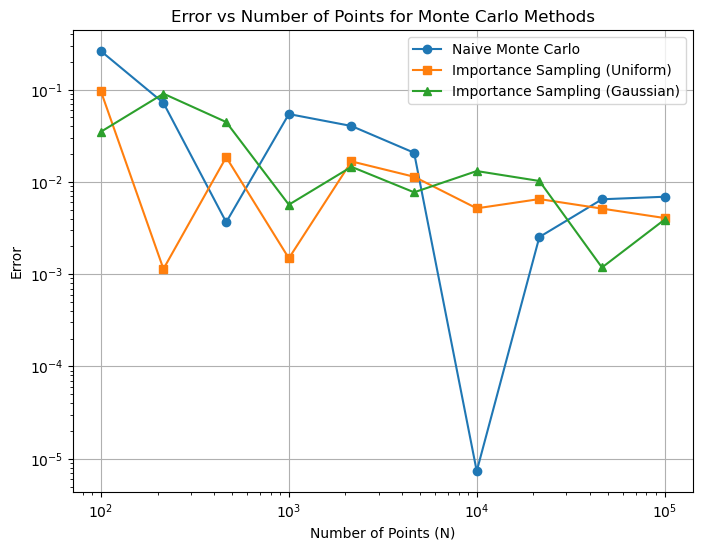

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def compute_quarter_circle_area(num_random_pts):
    """Estimate the area of the quarter-circle using Monte Carlo method."""
    inside_circle = 0
    for _ in range(num_random_pts):
        x, y = np.random.uniform(0, 1, 2)  # Generate random point in unit square
        if x**2 + y**2 <= 1:  # Check if inside quarter-circle
            inside_circle += 1
    estimated_area = inside_circle / num_random_pts  # Ratio of points inside quarter-circle
    return estimated_area * 4  # Scale to full unit circle area

def MonteCarlo_Uniform(f, a, b, num_points):
    """Monte Carlo integration with uniform sampling."""
    x_samples = np.random.uniform(a, b, num_points)
    f_values = f(x_samples)
    integral_estimate = (b - a) * np.mean(f_values)
    return integral_estimate

def MonteCarlo_Gaussian(f, num_points):
    """Monte Carlo integration with Gaussian sampling."""
    x_samples = np.random.normal(0, 0.5, num_points)
    weights = 1 / (np.sqrt(2 * np.pi) * 0.5) * np.exp(-x_samples**2 / (2 * 0.5**2))
    f_values = f(x_samples) / weights
    integral_estimate = np.mean(f_values)
    return integral_estimate * 2  # Scale for full circle

def semicircle_function(x):
    return np.sqrt(np.maximum(0, 1 - x**2))

def compute_error(num_points, method):
    """Compute error for a given number of points using different Monte Carlo methods."""
    exact_area = np.pi
    if method == 'naive':
        estimated_area = compute_quarter_circle_area(num_points)
    elif method == 'uniform':
        estimated_area = MonteCarlo_Uniform(semicircle_function, -1, 1, num_points) * 2
    elif method == 'gaussian':
        estimated_area = MonteCarlo_Gaussian(semicircle_function, num_points)
    else:
        raise ValueError("Unknown method")
    return abs(estimated_area - exact_area)

N_values = np.logspace(2, 5, num=10, dtype=int)
errors_naive = [compute_error(N, 'naive') for N in N_values]
errors_uniform = [compute_error(N, 'uniform') for N in N_values]
errors_gaussian = [compute_error(N, 'gaussian') for N in N_values]

plt.figure(figsize=(8, 6))
plt.loglog(N_values, errors_naive, label='Naive Monte Carlo', marker='o')
plt.loglog(N_values, errors_uniform, label='Importance Sampling (Uniform)', marker='s')
plt.loglog(N_values, errors_gaussian, label='Importance Sampling (Gaussian)', marker='^')
plt.xlabel('Number of Points (N)')
plt.ylabel('Error')
plt.legend()
plt.title('Error vs Number of Points for Monte Carlo Methods')
plt.grid()
plt.show()